In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pylab as plt

from glob import glob

9 files loades


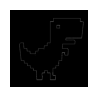

0 31: area = 755.0 aspect ratio = 1.032258064516129 perimeter = 117.31370830535889


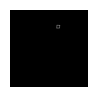

0 33: area = 727.5 aspect ratio = 1.0308747855917668 perimeter = 6119.727044582367


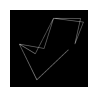

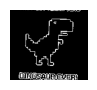

1 2: area = 280.5 aspect ratio = 3.4615384615384617 perimeter = 196.81118202209473


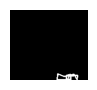

1 3: area = 874.0 aspect ratio = 4.75 perimeter = 196.85281217098236


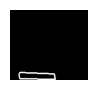

1 4: area = 4199.0 aspect ratio = 1.0309278350515463 perimeter = 496.73506212234497


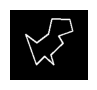

1 9: area = 15.0 aspect ratio = 6.0 perimeter = 110.56854152679443


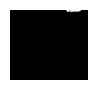

1 11: area = 23.5 aspect ratio = 9.0 perimeter = 116.66904675960541


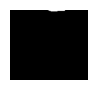

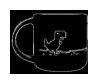

2 16: area = 10.5 aspect ratio = 1.5 perimeter = 13.071067690849304


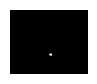

2 47: area = 45.0 aspect ratio = 1.0869565217391304 perimeter = 360.4507911205292


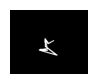

2 52: area = 40.0 aspect ratio = 0.4603174603174603 perimeter = 270.85281205177307


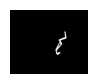

2 66: area = 82.5 aspect ratio = 0.611764705882353 perimeter = 335.0954523086548


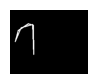

2 72: area = 466.5 aspect ratio = 1.3312101910828025 perimeter = 1219.9625449180603


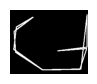

2 76: area = 96.0 aspect ratio = 69.5 perimeter = 281.79898953437805


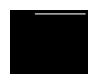

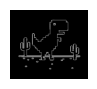

3 0: area = 25.5 aspect ratio = 1.8 perimeter = 19.899494767189026


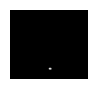

3 1: area = 26.0 aspect ratio = 1.6 perimeter = 19.656854152679443


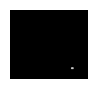

3 2: area = 29.0 aspect ratio = 1.8 perimeter = 21.656854152679443


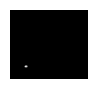

3 3: area = 22.0 aspect ratio = 1.4 perimeter = 17.656854152679443


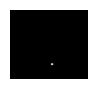

3 4: area = 31.0 aspect ratio = 2.0 perimeter = 22.485281229019165


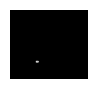

3 5: area = 24.5 aspect ratio = 1.6 perimeter = 19.071067690849304


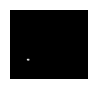

3 6: area = 46.5 aspect ratio = 1.6666666666666667 perimeter = 41.55634891986847


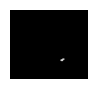

3 7: area = 22.0 aspect ratio = 2.25 perimeter = 19.656854152679443


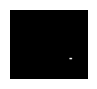

3 8: area = 30.0 aspect ratio = 1.8 perimeter = 21.656854152679443


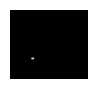

3 9: area = 29.0 aspect ratio = 1.8 perimeter = 21.656854152679443


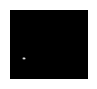

3 10: area = 14270.0 aspect ratio = 1.5276073619631902 perimeter = 1698.7005710601807


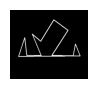

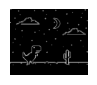

4 24: area = 825.5 aspect ratio = 2.090909090909091 perimeter = 596.0660148859024


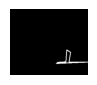

4 28: area = 2096.0 aspect ratio = 1.2857142857142858 perimeter = 408.4507908821106


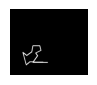

4 49: area = 13.0 aspect ratio = 4.857142857142857 perimeter = 210.2253955602646


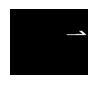

4 56: area = 11.5 aspect ratio = 1.0769230769230769 perimeter = 50.870057225227356


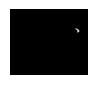

4 89: area = 11.0 aspect ratio = 1.0 perimeter = 12.485281229019165


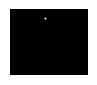

5 48: area = 44.0 aspect ratio = 180.0 perimeter = 2913.195958018303


5 68: area = 18.0 aspect ratio = 9.5 perimeter = 38.0


5 92: area = 127.5 aspect ratio = 0.47058823529411764 perimeter = 147.01219260692596


5 94: area = 967.0 aspect ratio = 2.0625 perimeter = 248.08326029777527


5 95: area = 979.5 aspect ratio = 2.0625 perimeter = 244.6690467596054


5 102: area = 105.5 aspect ratio = 1.0833333333333333 perimeter = 55.899494767189026


5 103: area = 49.5 aspect ratio = 1.0833333333333333 perimeter = 77.0710676908493


5 104: area = 54.0 aspect ratio = 1.0 perimeter = 54.97056245803833


5 105: area = 111.0 aspect ratio = 1.0 perimeter = 44.485281229019165


5 106: area = 38.5 aspect ratio = 1.0 perimeter = 75.0710676908493


5 107: area = 72.0 aspect ratio = 1.0 perimeter = 61.31370830535889


5 108: area = 94.0 aspect ratio = 1.0833333333333333 perimeter = 51.31370830535889


5 109: area = 49.0 aspect ratio = 1.0833333333333333 perimeter = 79.79898953437805


5 114: area = 458.5 aspect ratio = 1.368421052631579 perimeter = 211.29646337032318


5 118: area = 917.0 aspect ratio = 0.9423076923076923 perimeter = 285.53910398483276


5 119: area = 970.0 aspect ratio = 0.9230769230769231 perimeter = 263.0538227558136


5 120: area = 996.0 aspect ratio = 0.9423076923076923 perimeter = 266.71067690849304


5 121: area = 923.0 aspect ratio = 0.9230769230769231 perimeter = 282.3675310611725


5 122: area = 898.5 aspect ratio = 0.9230769230769231 perimeter = 259.9827550649643


5 123: area = 919.5 aspect ratio = 0.9423076923076923 perimeter = 281.2964633703232


5 124: area = 939.0 aspect ratio = 0.9423076923076923 perimeter = 282.3675310611725


5 125: area = 390.5 aspect ratio = 0.375 perimeter = 215.49747383594513


5 130: area = 494.5 aspect ratio = 1.625 perimeter = 211.29646337032318


5 131: area = 1390.0 aspect ratio = 1.1944444444444444 perimeter = 150.97056245803833


5 132: area = 35.5 aspect ratio = 0.8333333333333334 perimeter = 54.72792184352875


5 133: area = 52.0 aspect ratio = 0.9166666666666666 perimeter = 59.65685415267944


5 134: area = 64.0 aspect ratio = 0.9166666666666666 perimeter = 56.97056245803833


5 135: area = 83.0 aspect ratio = 0.9166666666666666 perimeter = 43.31370830535889


5 136: area = 25.5 aspect ratio = 0.9166666666666666 perimeter = 52.72792184352875


5 137: area = 61.5 aspect ratio = 0.9166666666666666 perimeter = 50.72792184352875


5 138: area = 33.0 aspect ratio = 0.9166666666666666 perimeter = 71.79898953437805


5 139: area = 58.5 aspect ratio = 0.9166666666666666 perimeter = 42.72792184352875


5 140: area = 29.5 aspect ratio = 0.9166666666666666 perimeter = 68.87005722522736


5 141: area = 45.0 aspect ratio = 0.9166666666666666 perimeter = 72.62741661071777


5 142: area = 36.5 aspect ratio = 0.8333333333333334 perimeter = 44.72792184352875


5 143: area = 85.5 aspect ratio = 0.9166666666666666 perimeter = 38.72792184352875


5 144: area = 631.0 aspect ratio = 0.5172413793103449 perimeter = 272.71067690849304


5 145: area = 615.0 aspect ratio = 0.5 perimeter = 267.0538227558136


5 146: area = 633.5 aspect ratio = 0.543859649122807 perimeter = 296.1248904466629


5 147: area = 603.0 aspect ratio = 0.49122807017543857 perimeter = 256.56854140758514


5 148: area = 634.0 aspect ratio = 0.5087719298245614 perimeter = 262.2253956794739


5 149: area = 280.0 aspect ratio = 0.5 perimeter = 192.911687374115


5 150: area = 311.5 aspect ratio = 0.5 perimeter = 195.01219260692596


5 151: area = 280.0 aspect ratio = 0.5 perimeter = 171.5979790687561


5 152: area = 579.0 aspect ratio = 0.975 perimeter = 347.6812393665314


5 153: area = 270.0 aspect ratio = 0.475 perimeter = 168.76955199241638


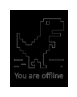

6 9: area = 300.0 aspect ratio = 0.8333333333333334 perimeter = 152.76955199241638


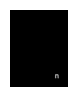

6 10: area = 116.0 aspect ratio = 0.16666666666666666 perimeter = 66.0


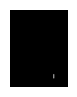

6 11: area = 426.5 aspect ratio = 0.8666666666666667 perimeter = 133.01219236850739


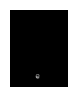

6 12: area = 411.0 aspect ratio = 0.7666666666666667 perimeter = 132.7695517539978


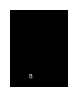

6 13: area = 280.0 aspect ratio = 0.8 perimeter = 152.28427076339722


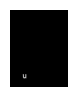

6 14: area = 427.5 aspect ratio = 0.8387096774193549 perimeter = 134.66904664039612


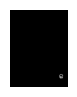

6 17: area = 662.5 aspect ratio = 0.9032258064516129 perimeter = 97.01219260692596


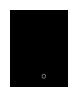

6 18: area = 157.0 aspect ratio = 0.5161290322580645 perimeter = 93.79898953437805


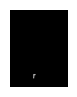

6 19: area = 665.5 aspect ratio = 0.9032258064516129 perimeter = 97.01219248771667


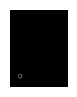

6 26: area = 277.0 aspect ratio = 0.7073170731707317 perimeter = 150.22539567947388


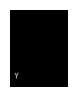

6 27: area = 27.0 aspect ratio = 1.0 perimeter = 20.485281229019165


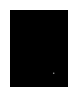

6 28: area = 682.5 aspect ratio = 1.0454545454545454 perimeter = 359.1543278694153


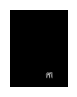

6 29: area = 198.0 aspect ratio = 4.857142857142857 perimeter = 78.0


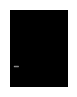

6 30: area = 67.0 aspect ratio = 1.625 perimeter = 36.82842707633972


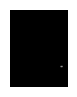

6 32: area = 223.0 aspect ratio = 4.125 perimeter = 78.82842707633972


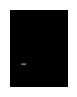

6 35: area = 770.0 aspect ratio = 13.875 perimeter = 234.0


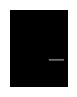

6 36: area = 462.0 aspect ratio = 8.375 perimeter = 146.0


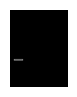

6 40: area = 56516.5 aspect ratio = 0.941952506596306 perimeter = 2133.6396092176437


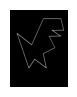

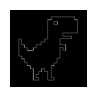

7 3: area = 25587.0 aspect ratio = 0.924901185770751 perimeter = 1335.0538227558136


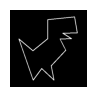

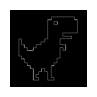

8 0: area = 25586.5 aspect ratio = 0.924901185770751 perimeter = 1333.6396092176437


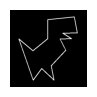

In [7]:
dino_files = glob('./imgs/dinos/*') #png gives an array of 0 and 1?
print(f"{len(dino_files)} files loades")


for index_img, file in enumerate(dino_files):
    img = cv.imread(file)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    blurred_image = cv.GaussianBlur(img_gray, (3, 3), 0)
    image_resized = cv.resize(img_gray, None, fx=0.60, fy=0.60)

    kernel_sharpening = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    img_sharpened = cv.filter2D(image_resized, -1, kernel_sharpening)

    eightbit = np.uint8(np.absolute(img_sharpened))#8-bit vallues within range 0 to 255

    _, binary = cv.threshold(eightbit, 30, 255, cv.THRESH_BINARY)

    fig, ax = plt.subplots(figsize=(1,1))
    ax.imshow(binary, cmap='gray')
    ax.axis('off')
    plt.show()
    
    contours, hierarchy = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    for index, contour in enumerate(contours):
        x, y, w, h = cv.boundingRect(contour)
        
        area = cv.contourArea(contour)
        
        if area > 10:
            aspect_ratio = w / float(h)
            perimeter = cv.arcLength(contour, True)
            approx = cv.approxPolyDP(contour, 0.02 * perimeter, True)
            
            print(f"{index_img} {index}: area = {area} aspect ratio = {aspect_ratio} perimeter = {perimeter}")
            
            canvas = np.zeros_like(binary)
            cv.drawContours(canvas, [approx], -1, (255, 255, 255), thickness=2)
            
            fig, ax = plt.subplots(figsize=(1, 1))
            ax.imshow(canvas, cmap='gray')
            ax.axis('off')
            plt.show()
